In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [13]:
# !pip install cartopy

In [3]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
xrds = xr.open_dataset(url)

In [4]:
# we can see it's a 3 dimensional dataset (time, lat, long, and z)
xrds

<xarray.Dataset> Size: 18MB
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (time, z, lat, lon) float32 18MB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

In [5]:
# month slices 
xrds.time

<xarray.DataArray 'time' (time: 1716)> Size: 14kB
array(['1880-01-01T00:00:00.000000000', '1880-02-01T00:00:00.000000000',
       '1880-03-01T00:00:00.000000000', ..., '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-01 1880-02-01 ... 2022-12-01
Attributes:
    long_name:              reference time of global temperature anomalies
    standard_name:          time
    coverage_content_type:  coordinate
    axis:                   T

In [7]:
# getting one date out of the dataset to look at
target_date = '2022-12-01'
xrds_target = xrds.sel(time=target_date)

In [8]:
xrds_target

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 8B 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (z, lat, lon) float32 10kB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

In [18]:
# inspecting the attributes of the anom variable
xrds['anom'].attrs

{'long_name': 'Global Temperature Anomalies',
 'standard_name': 'surface_temperature_anomaly',
 'coverage_content_type': 'physicalMeasurement',
 'units': 'degrees C',
 'valid_min': -40.0,
 'valid_max': 40.0}

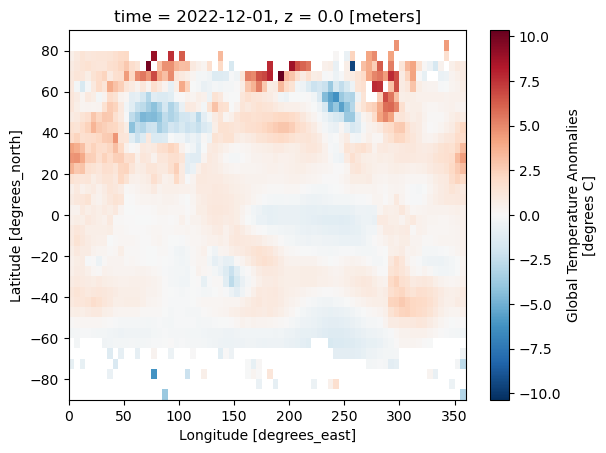

In [10]:
# need to use the crs library to help define coastlines better in the plot
xrds_target['anom'].plot()

Text(0, 0.5, 'Latitude')

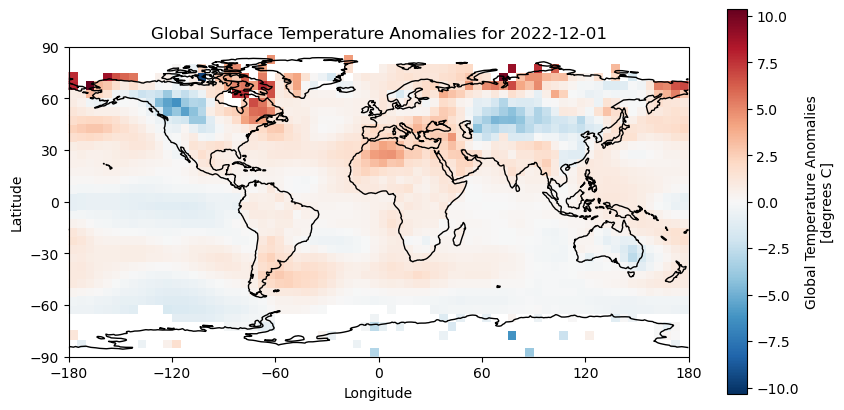

In [17]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
xrds_target['anom'].plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
# setting title
plt.title(f'Global Surface Temperature Anomalies for {target_date}')
# setting tick marks
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
# setting labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')